In [1]:
import pandas as pd
data = pd.read_csv("ex2data1.txt", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
feature_cols = ['Exam 1', 'Exam 2']
X = data[feature_cols] # Features
y = data.Admitted # Target variable

In [3]:
# У нас очень маленький dataset, тем не менее давайте 
# разобъем его на обучающую и тестовую выборки (25%)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/tim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# Сделаем прогноз на базе 75% выборки для трех значений
import numpy as np
df2 = pd.DataFrame(np.array([[45, 85], [45, 75], [45, 65]]),
                  columns=['Exam 1', 'Exam 2'])
df2

,Exam 1,Exam 2
0,45,85
1,45,75
2,45,65


In [6]:
y_pred2=logreg.predict(df2)
y_pred2

array([1, 1, 0])

In [7]:
# Посмотрим вероятности прогноза
zzz = logreg.predict_proba(df2)
zzz

array([[0.37906909, 0.62093091],
       [0.44266278, 0.55733722],
       [0.50819351, 0.49180649]])

In [8]:
# Матрица ошибок (Confusion matrix) 
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8,  3],
       [ 0, 14]])

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

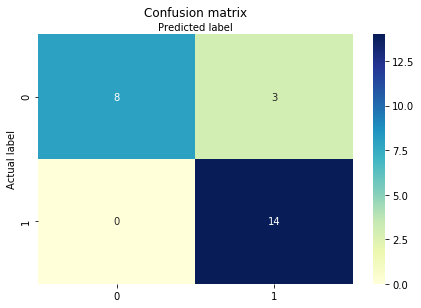

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.8235294117647058
Recall: 1.0


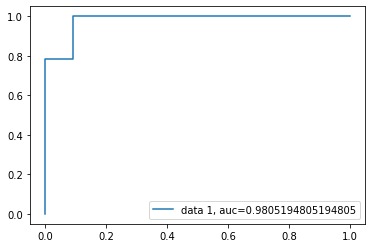

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
# Теперь обучим на 100% dataset-е
lr = LogisticRegression(solver='lbfgs')
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred_full=lr.predict(df2)
y_pred_full

array([1, 0, 0])

In [15]:
# Вероятности существенно изменились, а вторй вариант изменил значение.
# Это говорит о том, что маленьки датасет разбивать не имеет смысла.
zzz_f = lr.predict_proba(df2)
zzz_f

array([[0.2247144 , 0.7752856 ],
       [0.68296616, 0.31703384],
       [0.94121444, 0.05878556]])